![alt text](pictures/cifar10.png "CIFAR10")
# Training a Image Classifier
### New Package in this notes: <span style="color:red">torchvision</span>
http://pytorch.org/docs/torchvision/torchvision.html
#### Traing a image classifier based on CIFAR10 as the following steps:
- Load and normalizing the CIFAR10 training and test datasets using torchvision
- Define a Convolution Neural Network
- Define a loss function
- Train the network on the training data
- Test the network on the test data
---
## 1. Loading and normalizing CIFAR10

In [2]:
%matplotlib inline

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


上面代码第一次运行时显示：
```
Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz
Files already downloaded and verified
```
---
### 使用torchvision package下载并处理数据集。
- **torchvision.transforms.Compose()**可以把多个transforms.\*()函数集合在一起。这些transforms.\*()把输入图像转换成某种格式。例如上面的代码中把transform.ToTensor()和transform.Normalize()这两个函数组合了在一起。
 - **transforms.ToTensor()**: Converts a PIL.Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].
 - **transforms.Normalize(mean, std)**: Given mean: (R, G, B) and std: (R, G, B), will normalize each channel of the torch.\*Tensor, i.e. channel = (channel - mean) / std. 也就是标准化图像数据。
- **torchvision.datasets.CIFAR10()**：
 - root：数据集的根目录
 - train：=True时为训练集，=False时为测试集
 - download：=True时表示从网上下载数据集到根目录下，如果已经下载过，则什么都不做。
 - transform: 指明需要的转换步骤。
- **torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, sampler=None, num_workers=0, collate_fn=function default_collate, pin_memory=False, drop_last=False)**: 数据加载程序
 - dataset(trainset/testset)：从哪里加载数据
 - batch_size: 每一个batch中有几个样本
 - shuffle：如果时True，则在每一个epoch后打乱数据的顺序
 - num_workers: 使用几个线程载入数据。

In [11]:
print(trainset)
print(trainloader)

  car  deer plane  bird


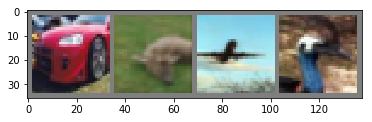

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)     # iter() is to read lines of a file until a certain line is reached
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 2. 定义卷积神经网络

In [5]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

注：
```python
.view(): Returns a new tensor with the same data but different size.
E.g.
>>> x = torch.randn(4, 4)
>>> x.size()
torch.Size([4, 4])
>>> y = x.view(16)
>>> y.size()
torch.Size([16])
>>> z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
>>> z.size()
torch.Size([2, 8])
```

## 3. 定义损失函数和优化器

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

## 4. 训练网络

In [7]:
for epoch in range(2):
    running_loss = 0
    for i, data in enumerate(trainloader, 0):   # enumerate(thing) return (0, thing[0]), (1, thing[1]),...
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print
        running_loss += loss.data[0]
        if i % 2000 == 1999:                  # print every 2000 mini-batch
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0
            
print('Finished Training')

[1,  2000] loss: 2.253
[1,  4000] loss: 1.857
[1,  6000] loss: 1.665
[1,  8000] loss: 1.578
[1, 10000] loss: 1.514
[1, 12000] loss: 1.456
[2,  2000] loss: 1.397
[2,  4000] loss: 1.375
[2,  6000] loss: 1.353
[2,  8000] loss: 1.330
[2, 10000] loss: 1.304
[2, 12000] loss: 1.313
Finished Training


## 5. 在测试数据集上测试神经网络



 3
 8
 8
 0
[torch.LongTensor of size 4]

('Ground Truth: ', '  cat  ship  ship plane')


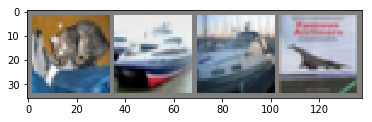

In [17]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print(labels)

imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
outputs = net(Variable(images))
print(outputs)
print(outputs.data)
_, predicted = torch.max(outputs.data, 1)
print(_)
print(predicted)
print('Predicted: ', " ".join('%5s' % classes[predicted[j][0]] for j in range(4)))

Variable containing:

Columns 0 to 7 
 -2.3651  -1.0204  -0.2224   3.3335  -0.0557   2.2254   0.8923  -1.1199
  7.1263   6.5507  -2.7360  -3.8514  -4.0859  -6.2206  -6.7404  -5.4120
  2.2768   2.2120  -0.5086  -1.3173  -1.2032  -2.6589  -2.9600  -1.7045
  4.9461   2.4030  -0.7406  -2.3374  -1.7571  -4.3366  -4.0236  -3.4177

Columns 8 to 9 
 -0.4827  -1.7411
 10.3903   3.7646
  3.8142   1.4575
  6.9897   1.8331
[torch.FloatTensor of size 4x10]



Columns 0 to 7 
 -2.3651  -1.0204  -0.2224   3.3335  -0.0557   2.2254   0.8923  -1.1199
  7.1263   6.5507  -2.7360  -3.8514  -4.0859  -6.2206  -6.7404  -5.4120
  2.2768   2.2120  -0.5086  -1.3173  -1.2032  -2.6589  -2.9600  -1.7045
  4.9461   2.4030  -0.7406  -2.3374  -1.7571  -4.3366  -4.0236  -3.4177

Columns 8 to 9 
 -0.4827  -1.7411
 10.3903   3.7646
  3.8142   1.4575
  6.9897   1.8331
[torch.FloatTensor of size 4x10]


  3.3335
 10.3903
  3.8142
  6.9897
[torch.FloatTensor of size 4x1]


 3
 8
 8
 8
[torch.LongTensor of size 4x1]

('Predi

- torch.max()函数返回数据数据的最大值，参数1表示在哪个维度检测最大值。上面的代码中，变量\_是最大值，变量predicted返回最大值的索引值，也就是最大值的位置。
- classes是在cell 1 中定义的类别标签。
- 上面代码最后一行predicted[j][0]就是访问predicted的地j行第0列的元素，因为predicted是4x1的，所以写成predicted[j]也是一样可以的。

In [15]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [18]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    iamges, labels = data
    outputs = net(Variable(iamges))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58 %
Accuracy of   car : 65 %
Accuracy of  bird : 37 %
Accuracy of   cat : 51 %
Accuracy of  deer : 28 %
Accuracy of   dog : 48 %
Accuracy of  frog : 62 %
Accuracy of horse : 62 %
Accuracy of  ship : 80 %
Accuracy of truck : 42 %


In [19]:
net.cuda()

AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx